In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Load the dataset**

In [3]:
data = pd.read_csv('./diabetes.csv')

**Menampilkan info dasar dan baris awal**

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Periksa apakah ada nilai yang hilang**

In [5]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Ringkasan Data**

In [6]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

**Prapemrosesan Data**      
Fitur dan target terpisah

In [7]:
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

**Membagi data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

**Standarisasi fitur untuk meningkatkan kinerja model**

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Pelatihan Model - Pengklasifikasi KNN**      
Inisialisasi model KNN dengan k=91 (dapat menyetel parameter ini)

In [20]:
k = 91
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=91)

**Evaluasi Model**      
Membuat prediksi pada data uji

In [21]:
y_pred = knn.predict(X_test)

**Mengevaluasi kinerja model**

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model with k={k}: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy of KNN model with k=91: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       102
           1       0.86      0.37      0.51        52

    accuracy                           0.77       154
   macro avg       0.81      0.67      0.68       154
weighted avg       0.79      0.77      0.73       154




Confusion Matrix:


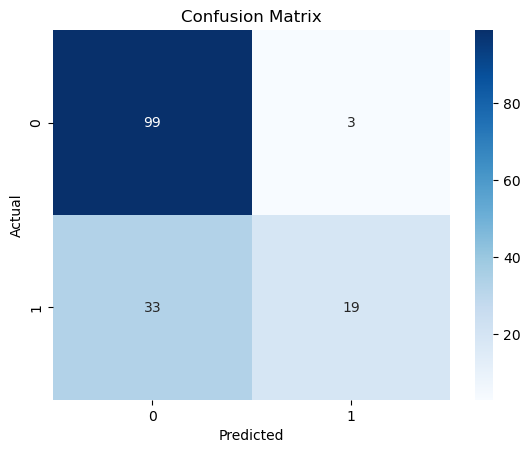

In [23]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
error_rates = []
k_range = range(6, 95)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

optimal_k = k_range[np.argmin(error_rates)]
optimal_error_rate = min(error_rates)

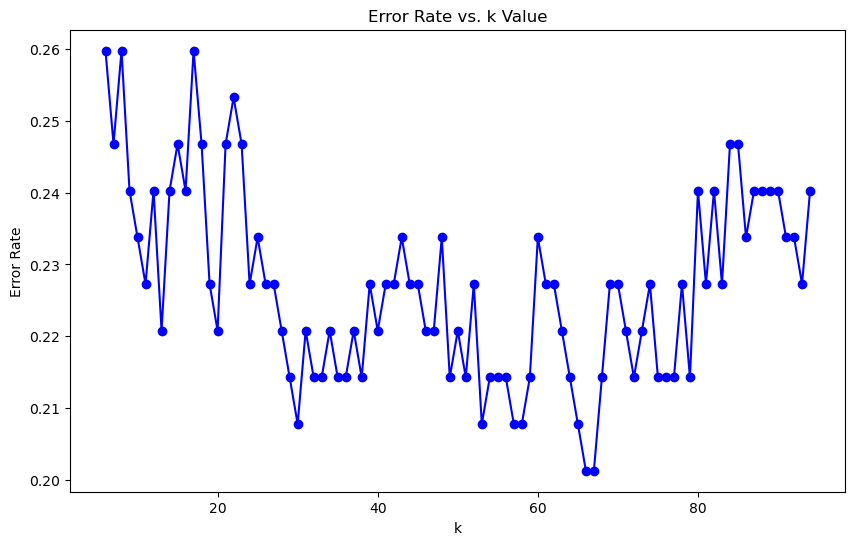

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value')
plt.show()

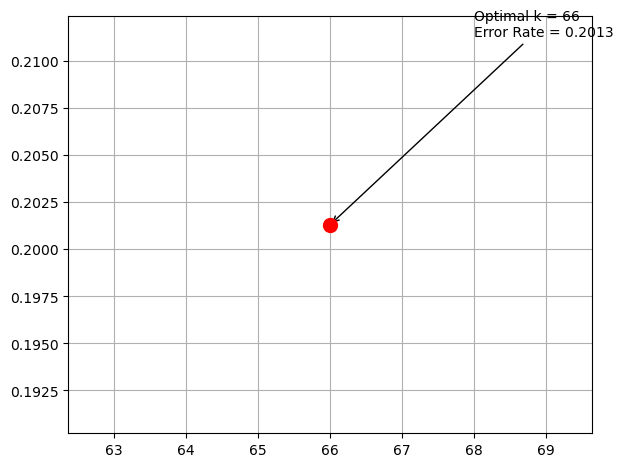

In [30]:
plt.scatter(optimal_k, optimal_error_rate, color='red', s=100, zorder=5)  # Titik optimal
plt.annotate(f'Optimal k = {optimal_k}\nError Rate = {optimal_error_rate:.4f}', 
             xy=(optimal_k, optimal_error_rate), 
             xytext=(optimal_k + 2, optimal_error_rate + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.grid()
plt.tight_layout()
plt.show()

## Kesimpulan

Dalam penelitian ini, kami menganalisis penggunaan metode K-Nearest Neighbors (KNN) untuk memprediksi penyakit diabetes. Hasil eksperimen menunjukkan bahwa nilai **k** optimal yang memberikan akurasi terbaik adalah **k = 66**, dengan tingkat kesalahan (error rate) tertinggi sebesar **20.13%**. 

Meskipun nilai **k** ini menghasilkan akurasi yang memadai, tingkat kesalahan yang tinggi menunjukkan bahwa model KNN masih dapat ditingkatkan lebih lanjut. Penggunaan nilai **k** yang lebih rendah atau metode optimasi lainnya dapat menjadi fokus penelitian di masa depan untuk mengurangi tingkat kesalahan dan meningkatkan keandalan model.

Hasil ini menekankan pentingnya pemilihan parameter dalam pengembangan model KNN, serta perlunya evaluasi lebih lanjut untuk mencapai kinerja yang optimal dalam prediksi penyakit diabetes.
